# Exercises XP Gold: W2_D2

## What You’ll Learn
- Perform a comparative analysis of structured and unstructured retail data.
- Understand the processing and analysis of structured and unstructured healthcare data.
- Gain familiarity with structured data through basic exploration.
- Understand the challenges of working with unstructured data and identify structured elements in a public transportation dataset.
- Generate a synthetic product catalog for an e-commerce platform using Faker.

## What You Will Create
- A comparative analysis document discussing the insights from structured and unstructured retail data and the challenges in processing them.
- Identification of structured data elements within the E-Commerce dataset.
- Categorization of data elements in the dataset as structured or unstructured with justifications.
- A Python script using Faker to generate a synthetic product catalog for an e-commerce platform.

---

## Exercise 1: Comparative Analysis of Retail Data

**Dataset:** Use the Retail Dataset for structured data and Women’s E-Commerce Clothing Reviews for unstructured data.

**Tasks:**
1. Analyze the Retail Dataset focusing on sales trends, customer purchase patterns, and store performance.
2. Analyze the Clothing Reviews dataset to extract insights like predominant sentiments, frequently mentioned topics, and overall customer satisfaction.
3. Compare the insights you can derive from each dataset and discuss the challenges you faced in processing the unstructured data.

---

## Exercise 2: Basic Data Exploration in E-Commerce

**Dataset:** Use the “E-Commerce Data” dataset.

**Tasks:**
1. Load the dataset using Pandas and print the first few rows to understand its structure.
2. Print basic information about the dataset, like the number of rows, columns, and column names.
3. Identify which columns in the dataset represent structured data (like numerical values, dates, fixed categories).
4. Suggest what type of unstructured data could complement this dataset for a more comprehensive analysis (e.g., customer reviews, product descriptions).
5. Discuss how this unstructured data might be used in conjunction with the structured data.

---

## Exercise 3: Analyzing a Public Transportation Dataset with a Focus on Data Types

**Dataset:** Use the “Metro Interstate Traffic Volume” dataset.

**Tasks:**
1. Load the dataset and display the first few rows to get a sense of the data.
2. Identify and print the structured elements in the dataset, such as date-time, traffic volume, etc.
3. Based on your observation of the dataset, categorize the data elements as structured or unstructured, explaining your reasoning.

---

## Exercise 4: Basic Data Analysis in a Movie Ratings Dataset

**Dataset:** Use the “MovieLens Latest Datasets”.

**Tasks:**
1. Load the `ratings.csv` file from the dataset, which contains user ratings for movies, and display the first few rows.
2. Identify and list down the structured elements in the dataset, such as user IDs, movie IDs, ratings, and timestamps.
3. Explain why the data elements in the `ratings.csv` file are considered structured data.

---

## Exercise 5: Creating a Synthetic Product Catalog

We want to generate a synthetic product catalog for an e-commerce platform using Faker.

**Tasks:**
1. Ensure that the Faker library is installed and imported into your Python environment.
2. Create a dataset of 500 products. Each product should have a unique ID, name, description, and price.
3. Use Pandas to create a DataFrame from the generated data.

## Exercise 1 — Comparative Analysis of Retail Data

## Objective
Perform a comparative analysis between structured retail data and unstructured clothing review data.

### Steps
1. Structured Data Analysis  
   - Merge datasets  
   - Analyze sales trends, customer purchase patterns, and store performance

2. Unstructured Data Analysis  
   - Clean and process text data  
   - Extract sentiments, topics, and satisfaction indicators

3. Comparative Analysis  
   - Compare the insights derived from each type of data  
   - Discuss challenges with unstructured data

### 1 — Load datasets

In [1]:
# Title: Load Datasets
# Description: Load structured and unstructured datasets from local files in Colab.

import pandas as pd

# Structured datasets
features_df = pd.read_csv("features_data_set.csv")
sales_df = pd.read_csv("sales_data_set.csv")
stores_df = pd.read_csv("stores_data_set.csv")

# Unstructured dataset
reviews_df = pd.read_csv("womens_clothing_ecommerce_reviews.csv")

print("Features shape:", features_df.shape)
print("Sales shape:", sales_df.shape)
print("Stores shape:", stores_df.shape)
print("Reviews shape:", reviews_df.shape)


Features shape: (8190, 12)
Sales shape: (421570, 5)
Stores shape: (45, 3)
Reviews shape: (23486, 11)


### 2 — Merge structured datasets

In [2]:
# Title: Merge Structured Datasets
# Description: Merge features, sales, and stores datasets on common keys.

# Merge sales with features
retail_df = pd.merge(sales_df, features_df, on=["Store", "Date"], how="left")

# Merge with stores info
retail_df = pd.merge(retail_df, stores_df, on="Store", how="left")

print("Merged dataset shape:", retail_df.shape)
retail_df.head()

Merged dataset shape: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


### 3 — Structured Data Analysis

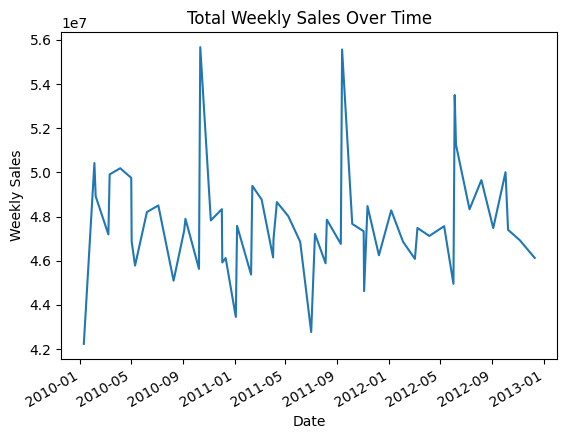

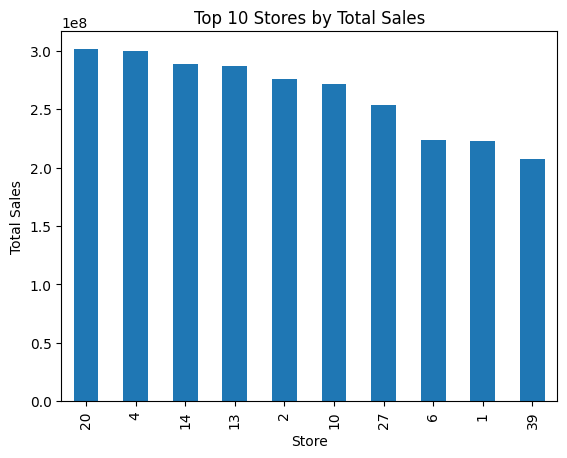

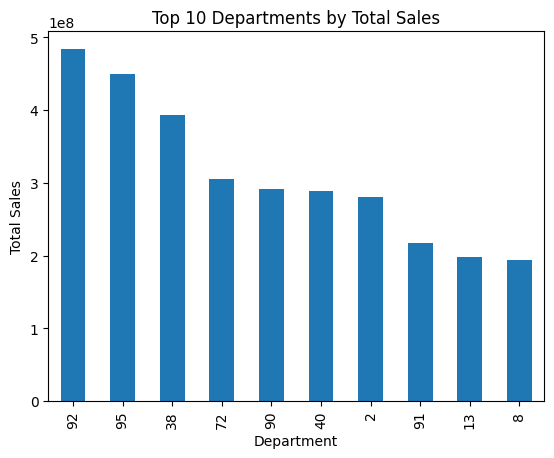

In [3]:
# Title: Structured Data Analysis
# Description: Analyze sales trends, customer purchase patterns, and store performance.

import matplotlib.pyplot as plt

# Convert Date to datetime for time analysis
retail_df["Date"] = pd.to_datetime(retail_df["Date"], errors="coerce")

# Sales trend over time
sales_by_date = retail_df.groupby("Date")["Weekly_Sales"].sum()
plt.figure()
sales_by_date.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

# Store performance ranking
store_performance = retail_df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)
plt.figure()
store_performance.head(10).plot(kind="bar")
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

# Department performance
dept_performance = retail_df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False)
plt.figure()
dept_performance.head(10).plot(kind="bar")
plt.title("Top 10 Departments by Total Sales")
plt.xlabel("Department")
plt.ylabel("Total Sales")
plt.show()

### 4 — Unstructured Data Cleaning

In [4]:
# Description: Prepare text data for sentiment and topic analysis.

# Keep only relevant columns
text_df = reviews_df[["Review Text", "Rating"]].dropna(subset=["Review Text"])

# Drop rows where Review Text is empty after stripping spaces
text_df["Review Text"] = text_df["Review Text"].astype(str).str.strip()
text_df = text_df[text_df["Review Text"] != ""]

print("Text dataset shape after cleaning:", text_df.shape)
text_df.head()

Text dataset shape after cleaning: (22641, 2)


,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


### 5 — Sentiment Analysis (Simple)

In [5]:
# Description: Use TextBlob to compute sentiment polarity for each review.

!pip install textblob --quiet
from textblob import TextBlob

# Compute polarity score
text_df["Polarity"] = text_df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment
def classify_sentiment(p):
    if p > 0.05:
        return "Positive"
    elif p < -0.05:
        return "Negative"
    else:
        return "Neutral"

text_df["Sentiment"] = text_df["Polarity"].apply(classify_sentiment)

print(text_df["Sentiment"].value_counts(normalize=True).round(2) * 100)


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Sentiment
Positive    90.0
Neutral      7.0
Negative     3.0
Name: proportion, dtype: float64


### 6 — Most Frequent Words

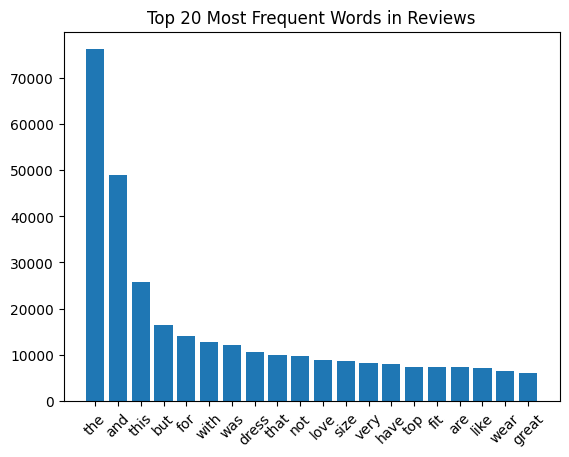

In [6]:
# Description: Extract the most common words from reviews.

from collections import Counter
import re

# Basic tokenization
all_words = []
for review in text_df["Review Text"]:
    words = re.findall(r'\b[a-z]{3,}\b', review.lower())
    all_words.extend(words)

word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Plot top 20 words
words, counts = zip(*common_words)
plt.figure()
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Reviews")
plt.show()

### 7 — Satisfaction Analysis

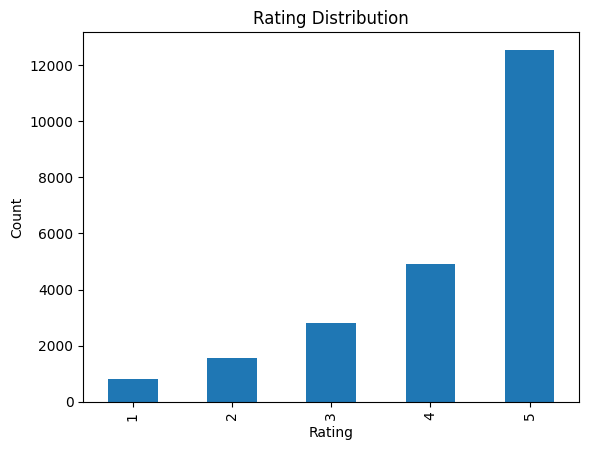

Average Rating: 4.18 / 5


In [7]:
# Description: Evaluate satisfaction based on ratings.

rating_counts = text_df["Rating"].value_counts().sort_index()

plt.figure()
rating_counts.plot(kind="bar")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

avg_rating = text_df["Rating"].mean()
print(f"Average Rating: {avg_rating:.2f} / 5")

### 8 — Comparative Analysis & Challenges

In [8]:
# Description: Compare insights from structured vs unstructured data.

print("=== Comparative Analysis ===")
print("""
Structured data allowed precise quantitative insights:
- Clear sales trends over time.
- Ranking of stores and departments.
- Easy to aggregate and compare metrics.

Unstructured data provided qualitative insights:
- Customer sentiment (positive, neutral, negative).
- Most frequently discussed topics.
- Satisfaction distribution.

Challenges with unstructured data:
- Requires text cleaning and preprocessing.
- Sentiment analysis can be ambiguous and context-dependent.
- More computational steps compared to structured data.
""")

=== Comparative Analysis ===

Structured data allowed precise quantitative insights:
- Clear sales trends over time.
- Ranking of stores and departments.
- Easy to aggregate and compare metrics.

Unstructured data provided qualitative insights:
- Customer sentiment (positive, neutral, negative).
- Most frequently discussed topics.
- Satisfaction distribution.

Challenges with unstructured data:
- Requires text cleaning and preprocessing.
- Sentiment analysis can be ambiguous and context-dependent.
- More computational steps compared to structured data.



### Conclusion

The analysis of the structured retail dataset allowed us to extract clear, quantitative insights such as sales trends over time, top-performing stores and departments, and overall revenue patterns. These findings were straightforward to obtain thanks to the well-organized and numeric nature of the data.

In contrast, the unstructured clothing reviews dataset provided qualitative insights, including customer sentiment, frequently mentioned topics, and satisfaction levels. While these insights are valuable for understanding customer perceptions, they required additional preprocessing and natural language analysis, which can be more complex and time-consuming.

Overall, both structured and unstructured data offer complementary perspectives: structured data excels at revealing measurable performance metrics, while unstructured data captures customer opinions and experiences.

## Exercise 2: Basic Data Exploration in E-Commerce

## Objective
Explore the E-Commerce dataset, identify structured data columns, and suggest complementary unstructured data for deeper analysis.

### Steps
1. Load dataset and preview structure  
2. Print basic dataset information  
3. Identify structured data columns  
4. Suggest unstructured data types that could complement the dataset  
5. Discuss how structured and unstructured data can be used together

### 1 — Load dataset

In [14]:
# Description: Load the E-Commerce dataset from a local file, handling non-UTF8 encoding.

import pandas as pd

df_ecom = pd.read_csv("data_ecommerce.csv", encoding='latin1')  # or encoding='ISO-8859-1'

print("Dataset shape:", df_ecom.shape)
df_ecom.head()

Dataset shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 2 — Basic dataset information

In [15]:
# Description: Display basic information, column names, and statistics.

print("\n=== Info ===")
df_ecom.info()

print("\n=== Column Names ===")
print(df_ecom.columns.tolist())

print("\n=== First 5 rows ===")
display(df_ecom.head())

print("\n=== Descriptive Statistics (numeric) ===")
display(df_ecom.describe())

print("\n=== Descriptive Statistics (categorical) ===")
display(df_ecom.describe(include=['object']))


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

=== Column Names ===
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

=== First 5 rows ===


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom



=== Descriptive Statistics (numeric) ===


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



=== Descriptive Statistics (categorical) ===


,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


### 3 — Identify structured columns

In [16]:
# Description: Structured data includes numeric values, dates, and fixed categories.

structured_cols = []
for col in df_ecom.columns:
    if pd.api.types.is_numeric_dtype(df_ecom[col]):
        structured_cols.append(col)
    elif pd.api.types.is_datetime64_any_dtype(df_ecom[col]):
        structured_cols.append(col)
    elif df_ecom[col].nunique() < 50:  # heuristic for fixed categories
        structured_cols.append(col)

print("Structured data columns:")
for col in structured_cols:
    print("-", col)

Structured data columns:
- Quantity
- UnitPrice
- CustomerID
- Country


### 4 — Suggest unstructured data

In [17]:
# Description: Suggest what kind of unstructured data could complement this dataset.

unstructured_suggestions = [
    "Customer reviews and feedback text",
    "Product descriptions",
    "Customer service chat transcripts",
    "Social media posts mentioning the products",
    "Images of products or user-generated content"
]

print("Possible unstructured data to complement this dataset:")
for s in unstructured_suggestions:
    print("-", s)

Possible unstructured data to complement this dataset:
- Customer reviews and feedback text
- Product descriptions
- Customer service chat transcripts
- Social media posts mentioning the products
- Images of products or user-generated content


### 5 — Discuss how to use unstructured data with structured data

In [18]:
# Description: Explain how unstructured data could enhance analysis.

print("""
Unstructured data can be combined with structured data to provide deeper insights.

Examples:
- Linking customer reviews (text) to purchase history to analyze sentiment by product category.
- Using product descriptions to build recommendation systems.
- Analyzing customer service chat logs to identify common issues and correlate them with order data.
- Including product images for visual analysis and quality control.

Combining both data types allows businesses to measure performance quantitatively while also understanding qualitative factors influencing sales and customer satisfaction.
""")


Unstructured data can be combined with structured data to provide deeper insights.

Examples:
- Linking customer reviews (text) to purchase history to analyze sentiment by product category.
- Using product descriptions to build recommendation systems.
- Analyzing customer service chat logs to identify common issues and correlate them with order data.
- Including product images for visual analysis and quality control.

Combining both data types allows businesses to measure performance quantitatively while also understanding qualitative factors influencing sales and customer satisfaction.



### Conclusion

The E-Commerce dataset provides structured information such as numeric values, dates, and categorical fields that can be directly analyzed for business insights. Identifying these structured elements allows for straightforward aggregation, filtering, and statistical analysis.

Complementary unstructured data, such as customer reviews, product descriptions, and multimedia content, could provide qualitative insights into customer preferences, product performance, and brand perception. Combining both data types can give a more complete view of customer behavior, enabling better decision-making and more targeted business strategies.

## Exercise 3: Analyzing a Public Transportation Dataset with a Focus on Data Types

### Objective
Load and explore the Metro Interstate Traffic Volume dataset, identify structured elements, and categorize each column as structured or unstructured.

### Steps
1. Load dataset and preview  
2. Identify structured elements  
3. Categorize each column as structured or unstructured, with explanation

### 1 — Load dataset

In [19]:
# Description: Load the Metro Interstate Traffic Volume dataset from a local file.

import pandas as pd

df_traffic = pd.read_csv("metro_interstate_traffic_volume.csv", encoding="utf-8")

print("Dataset shape:", df_traffic.shape)
df_traffic.head()

Dataset shape: (48204, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


### 2 — Identify structured elements

In [20]:
# Description: Print columns that contain structured data such as numeric values, dates, and fixed categories.

structured_cols = []

for col in df_traffic.columns:
    if pd.api.types.is_numeric_dtype(df_traffic[col]):
        structured_cols.append(col)
    elif pd.api.types.is_datetime64_any_dtype(df_traffic[col]):
        structured_cols.append(col)
    elif df_traffic[col].nunique() < 50:  # low-cardinality categories
        structured_cols.append(col)

print("Structured data columns:")
for col in structured_cols:
    print("-", col)

Structured data columns:
- holiday
- temp
- rain_1h
- snow_1h
- clouds_all
- weather_main
- weather_description
- traffic_volume


### 3 — Categorize all columns

In [21]:
# Description: Classify each dataset column as structured or unstructured, with explanation.

column_types = {}

for col in df_traffic.columns:
    if pd.api.types.is_numeric_dtype(df_traffic[col]):
        column_types[col] = "Structured (numeric)"
    elif pd.api.types.is_datetime64_any_dtype(df_traffic[col]):
        column_types[col] = "Structured (date-time)"
    elif df_traffic[col].nunique() < 50:
        column_types[col] = "Structured (categorical)"
    else:
        column_types[col] = "Unstructured (text/description)"

print("Column classification:")
for col, ctype in column_types.items():
    print(f"{col}: {ctype}")

Column classification:
holiday: Structured (categorical)
temp: Structured (numeric)
rain_1h: Structured (numeric)
snow_1h: Structured (numeric)
clouds_all: Structured (numeric)
weather_main: Structured (categorical)
weather_description: Structured (categorical)
date_time: Unstructured (text/description)
traffic_volume: Structured (numeric)


### 4 - Explanation of Categorization

In [22]:
# Description: Provide reasoning for structured vs unstructured classification.

print("""
Structured data includes:
- Date and time columns: allow chronological analysis and filtering.
- Traffic volume: numeric and measurable.
- Weather-related numeric values: temperature, rain, snow amounts.
- Fixed category columns: e.g., holiday indicator, weather main condition.

Unstructured data includes:
- Free-text weather descriptions: require text processing before analysis.

Structured data is straightforward to filter, aggregate, and analyze statistically.
Unstructured data, while potentially valuable, requires preprocessing such as tokenization or text classification before it can be used effectively in analysis.
""")


Structured data includes:
- Date and time columns: allow chronological analysis and filtering.
- Traffic volume: numeric and measurable.
- Weather-related numeric values: temperature, rain, snow amounts.
- Fixed category columns: e.g., holiday indicator, weather main condition.

Unstructured data includes:
- Free-text weather descriptions: require text processing before analysis.

Structured data is straightforward to filter, aggregate, and analyze statistically.
Unstructured data, while potentially valuable, requires preprocessing such as tokenization or text classification before it can be used effectively in analysis.



### Conclusion

The Metro Interstate Traffic Volume dataset contains both structured and unstructured data elements. Structured columns, such as date-time, traffic volume, and categorical weather indicators, are straightforward to analyze for trends and correlations. In contrast, unstructured elements, such as detailed weather descriptions, require additional preprocessing and text analysis to extract useful insights. Recognizing these differences helps in choosing the right analytical techniques and tools for each data type.

## Exercise 4: Basic Data Analysis in a Movie Ratings Dataset

## Objective
Load and explore the ratings dataset from MovieLens, identify structured data elements, and explain why they are considered structured.

### Steps
1. Load the ratings dataset and preview  
2. Identify structured elements  
3. Explain why these data elements are structured

### 1. Load Ratings Dataset

In [23]:
# Description: Load the ratings.csv file and display basic information.

import pandas as pd

df_ratings = pd.read_csv("rating.csv", encoding="utf-8")

print("Dataset shape:", df_ratings.shape)
df_ratings.head()

Dataset shape: (20000263, 4)


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


### 2. Identify Structured Elements

In [24]:
# Description: Identify columns containing structured data.

structured_cols = []

for col in df_ratings.columns:
    if pd.api.types.is_numeric_dtype(df_ratings[col]):
        structured_cols.append(col)
    elif pd.api.types.is_datetime64_any_dtype(df_ratings[col]):
        structured_cols.append(col)

print("Structured data columns:")
for col in structured_cols:
    print("-", col)

Structured data columns:
- userId
- movieId
- rating


### 3. Explanation

In [25]:
# Title: Why These Elements Are Structured
# Description: Explain why the data elements in ratings.csv are considered structured.

print("""
The ratings.csv file contains the following structured elements:
- userId: Numeric identifier for the user, enabling grouping and filtering.
- movieId: Numeric identifier for the movie, allowing easy joins with other datasets.
- rating: Numeric value representing the user’s evaluation of a movie, suitable for aggregation and statistical analysis.
- timestamp: Numeric or date-time value indicating when the rating was given, useful for chronological analysis.

These elements are considered structured because they follow a predefined schema, have consistent formats, and can be directly processed and analyzed without requiring complex preprocessing.
""")


The ratings.csv file contains the following structured elements:
- userId: Numeric identifier for the user, enabling grouping and filtering.
- movieId: Numeric identifier for the movie, allowing easy joins with other datasets.
- rating: Numeric value representing the user’s evaluation of a movie, suitable for aggregation and statistical analysis.
- timestamp: Numeric or date-time value indicating when the rating was given, useful for chronological analysis.

These elements are considered structured because they follow a predefined schema, have consistent formats, and can be directly processed and analyzed without requiring complex preprocessing.



### Conclusion

The MovieLens ratings dataset contains fully structured data, with each column adhering to a predefined format. User and movie IDs act as categorical identifiers, ratings provide quantitative measures of user preferences, and timestamps offer temporal context for the ratings. Because the data is structured, it can be easily filtered, aggregated, and integrated with other datasets to support various analytical tasks, such as recommendation systems and trend analysis.

## Exercise 5: Creating a Synthetic Product Catalog

### Objective
Generate a synthetic product catalog for an e-commerce platform using the Faker library.

### Steps
1. Install and import Faker  
2. Generate 500 synthetic products with unique IDs, names, descriptions, and prices  
3. Create a Pandas DataFrame from the generated data

### 1 — Install and import Faker

In [26]:
# Description: Ensure Faker is installed and ready to use.

!pip install faker --quiet

from faker import Faker
import pandas as pd
import random


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 2 - Generate Synthetic Product Catalog

In [27]:
# Description: Create 500 products with ID, name, description, and price.

# Initialize Faker
fake = Faker()

# Generate data
product_data = []
for i in range(1, 501):
    product_id = i
    product_name = fake.word().capitalize() + " " + fake.word().capitalize()
    product_description = fake.sentence(nb_words=12)
    product_price = round(random.uniform(5.0, 500.0), 2)  # price between 5 and 500
    product_data.append([product_id, product_name, product_description, product_price])

# Create DataFrame
df_products = pd.DataFrame(product_data, columns=["ProductID", "Name", "Description", "Price"])

print("Generated product catalog shape:", df_products.shape)
df_products.head()

Generated product catalog shape: (500, 4)


,ProductID,Name,Description,Price
0,1,Nature Religious,Still economic white week live medical writer ...,81.60
1,2,Have Guess,Range those him individual lawyer number addre...,19.19
2,3,Push Less,Whatever simple say car human tell make reason...,57.52
3,4,Laugh Police,Seven sing popular ground wife report beyond s...,210.01
4,5,Control Back,Poor rate a help field admit inside court case...,230.98


### 3 - Save To CSV

In [28]:
# Description: Save the generated catalog to a CSV file for later use.

df_products.to_csv("synthetic_product_catalog.csv", index=False)
print("Synthetic product catalog saved as synthetic_product_catalog.csv")

Synthetic product catalog saved as synthetic_product_catalog.csv


### Conclusion

Using the Faker library, we successfully generated a synthetic product catalog containing 500 unique products. Each product includes a unique identifier, a name, a short description, and a randomly generated price. This type of synthetic dataset can be useful for testing e-commerce platforms, developing data pipelines, or creating prototypes without relying on real customer or product data.

## Overall Conclusion

The XP Gold series provided practical experience in working with both structured and unstructured data across multiple domains. 

- In the retail analysis, we combined multiple structured datasets to identify sales trends, customer purchasing patterns, and store performance, and contrasted these with qualitative insights derived from unstructured customer reviews.
- In the e-commerce data exploration, we identified structured data elements and discussed how unstructured data could complement business analysis.
- In the transportation dataset, we classified data elements as structured or unstructured, emphasizing the analytical potential of each.
- In the movie ratings dataset, we identified and justified the structured nature of user ratings data, highlighting its readiness for statistical analysis and integration into recommendation systems.
- Finally, using the Faker library, we generated a synthetic e-commerce product catalog, demonstrating how artificial data can be used for testing and prototyping without exposing sensitive information.

Overall, the exercises reinforced the importance of recognizing different data types, applying appropriate analytical methods, and understanding how structured and unstructured data can complement each other in producing actionable insights.